*This notebook is part of  course materials for CS 345: Machine Learning Foundations and Practice at Colorado State University.
Original versions were created by Asa Ben-Hur.
The content is availabe [on GitHub](https://github.com/asabenhur/CS345).*

*The text is released under the [CC BY-SA license](https://creativecommons.org/licenses/by-sa/4.0/), and code is released under the [MIT license](https://opensource.org/licenses/MIT).*

<img style="padding: 10px; float:right;" alt="CC-BY-SA icon.svg in public domain" src="https://upload.wikimedia.org/wikipedia/commons/d/d0/CC-BY-SA_icon.svg" width="125">


<a href="https://colab.research.google.com/github//asabenhur/CS345/blob/master/notebooks/module05_02_classifier_accuracy.ipynb">
  <img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%autosave 0

Autosave disabled


# Measuring classifier accuracy

There is more to measuring classifier accuracy than using the standard accuracy measure defiend as the fraction of examples that are classified correctly.  There are many situations in which this is not the right way of measuring accuracy.  One example is when dealing with data that is imbalanced, ie. when one class has many more examples than the other.

### The confusion matrix

Before introducing additional measures of accuracy we will explore the **confusion matrix**.  We will do so using the iris dataset:

In [36]:
from sklearn import datasets
iris = datasets.load_iris()
X=iris.data
y=iris.target
print(X.shape, y.shape)

(150, 4) (150,)


We will use a nearest neighbor classifier for obtaining predictions:

In [37]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_predict

classifier = KNeighborsClassifier(n_neighbors=1)

y_pred = cross_val_predict(classifier, X, y, cv=5)
np.mean(y==y_pred)

0.96

#### Definition of the confusion matrix

Rows of the confusion matrix correspond to the true labels, while columns correspond to the predicted labels.
The elements of the matrix in a given row quantify how predictions are distributed across the different classes.
More formally, element $i, j$ in the matrix is the number of examples from class $i$ predicted to be in class $j$.
As its name suggests, it tells us where the classifiers tends to be confused.
Using the k-nearest neighbors classifier we obtain the following confusion matrix for our predictions on the iris dataset:


In [38]:
from sklearn.metrics import confusion_matrix
print (iris.target_names)
matrix = confusion_matrix(y, y_pred)

['setosa' 'versicolor' 'virginica']


array([[50,  0,  0],
       [ 0, 47,  3],
       [ 0,  3, 47]])

Scikit-learn has a function for making nicer visualization of the confusion matrix:

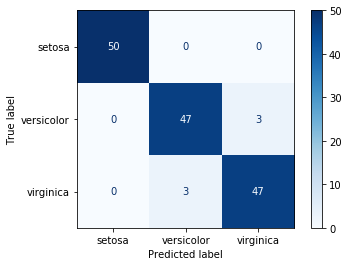

In [46]:
from sklearn.metrics._plot import confusion_matrix as cm

disp=cm.ConfusionMatrixDisplay(confusion_matrix=matrix,
                               display_labels=iris.target_names)
disp.plot(include_values=True,
          cmap=plt.cm.Blues);

Here, we used  "unofficial" scikit-learn functionality for plotting the confusion matrix.  Their "official" (i.e. documented method) is [plot_confusion_matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html).  This method takes in a classifier and a test set.  It then generates the predictions for the test set and plots the resulting confusion matrix.  It thus precludes plotting predictions generated using cross-validation.

Note that scikit-learn uses a convention that is different than other sources for labeling the axes of the confusion matrix (see e.g. the [wikipedia article on the confusion matrix](https://en.wikipedia.org/wiki/Confusion_matrix)).

### Question

How do you compute the accuracy of the classifier from the confusion matrix?

The confusion matrix provides more information than accuracy:  for this dataset it tells us that the classifier has some difficulty distinguishing between iris-versicolor and iris-virginica, while iris-setosa is perfectly distinguishable from the other two classes.
This makes sense in view of the following visualization of the data that demonstrates the overlap between iris-versicolor and iris-virginica:

In [47]:
def scatter_with_legend(X, y, ax, class_names) :
    colors = ['ob', 'or', 'oc']
    for c in range(len(class_names)):
        idx = (y==c)
        ax.plot(X[idx,0], X[idx,1], colors[c], 
                label = class_names[c], alpha=0.5)
    ax.legend()

Text(0.5, 1.0, 'last two features of iris data')

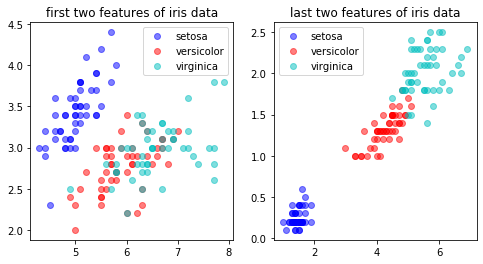

In [48]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(8,4))
scatter_with_legend(X[:,[0, 1]], y, ax1, iris.target_names)
scatter_with_legend(X[:,[2, 3]], y, ax2, iris.target_names)
ax1.set_title('first two features of iris data')
ax2.set_title('last two features of iris data')

### The confusion matrix for binary classification problems

For binary classification problems we have special terminology that we will present next.
First, we will take a look at a confusion matrix for a binary classification problem:

In [8]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

X = data.data
y = data.target
print('number of examples ', len(y))
print('number of features ', len(X[0]))
print(data.target_names)

number of examples  569
number of features  30
['malignant' 'benign']


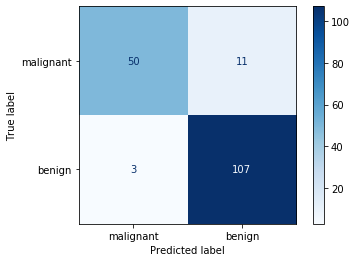

In [9]:
classifier = KNeighborsClassifier(n_neighbors=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3,
                                                    random_state=11)

classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(X_train, y_train)

# plot the confusion matrix
plot_confusion_matrix(classifier, X_test, y_test,
                      display_labels=data.target_names,
                      cmap=plt.cm.Blues,
                      values_format='d');

In the case of a binary classification problem the entries in the confusion matrix have names:

| True / Predicted | positive            | negative            |
| :--------------- |:------------------- | :------------------ |
| **positive**     | true positive (TP)  | false negative (FN) |
| **negative**     | false positive (FP) | true negative (TN)  |


Let's define $\mathrm{P} = \mathrm{TP} + \mathrm{FN}$ and $\mathrm{N} = \mathrm{FP} + \mathrm{TN}$.
In terms of the entries of the confusion matrix we can define additional measures of accuracy that are commonly used in machine learning:

**Recall** (true positive rate):

$$
\mathrm {recall} =\frac {\mathrm {TP} }{\mathrm {P} }
=\frac {\mathrm {TP} }{\mathrm {TP} +\mathrm {FN} }
$$

Recall tells us what fraction of the positive examples our classifier is able to classify correctly.
The true negative rate, or specifcity is defined analogously as $\mathrm{TN} / \mathrm{N}$.

**Precision:**

$$
 \mathrm {precision} =\frac {\mathrm {TP} }{\mathrm {TP} +\mathrm {FP} }
$$

Precision tells us how accurate are the positive predictions, i.e. when the classifier makes a positive prediction, how likely it is to be correct.

**Accuracy**:

$$
\mathrm{accuracy}= 
\frac{\mathrm{TP} + \mathrm{TN}}{\mathrm{P + N}}
$$


**Balanced accuracy** is the mean of recall (true positive rate) and specificity (true negative rate):

$$
\mathrm{balanced-accuracy}= 
\frac{1}{2}\left( \frac{\mathrm{TP}}{\mathrm{P}} + \frac{\mathrm{TN}}{\mathrm{N}}  \right)
$$

Earlier in the course we pointed out that the standard measure of accuracy is not a good indication of  success for data that is imbalanced.  In particular, we have seen that the majority classifier has very high accuracy for imbalanced data.  Balanced accuracy addresses this shortcoming.

The **F1 score** is the harmonic mean of precision and recall:

$$
\mathrm {F} _{1}=2\cdot {\frac {\mathrm {precision} \cdot \mathrm {recall} }{\mathrm {precision} +\mathrm {recall} }}
$$

The F1 score is commonly used in the field of information retrieval to measure performance in search, text categorization, and other natural language processing applications.
The F1 score focuses on true positives and does not take into account into account true negatives.  Its focus is on how well a classifier is performing in retrieving relevant items.

### Exercises

* What is the balanced accuracy of the majority classifier?
* Show that when the data has an equal number of positive and negative examples, balanced accuracy is equal to accuracy.


This by no means exhausts the available options of accuracy measures for classification problems.  Precision-recall curves and ROC curves are  useful visual tools for exploring a classifier's performance.